#1) Importando Bibliotecas

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

In [33]:
minimo_infectados = pd.read_csv('fixed_parameters_prob_ext_germano.csv', header=None)
minimo_infectados = minimo_infectados.iloc[1:].reset_index(drop=True)

# 2. Definir os nomes das colunas
minimo_infectados.columns = [
    'Removal Rate',
    'Basic Reprodution Number',
    'Immunity loss rate',
    'Vaccination begin time',
    'Vaccines Number (Normalized)',
    'Vaccination Rate',
    'Population',
    'Extinction Probability'
]

minimo_infectados = minimo_infectados.astype('float')
# Calculating the log of the population 
minimo_infectados['Population (log)'] = np.log10(minimo_infectados['Population'].replace(0, np.nan))

# Protection against division by zero
pop = minimo_infectados['Population'].replace(0, np.nan)

# Removing the population column
minimo_infectados = minimo_infectados.drop(columns=['Population'])

def arredondar_significativos(x, alg=4):
    if isinstance(x, (int, float, np.number)):
        if x == 0:
            return 0
        else:
            return round(x, -int(np.floor(np.log10(abs(x)))) + (alg - 1))
    return x  # retorna valor original se não for número

# Aplica a função a todas as células do DataFrame
minimo_infectados = minimo_infectados.applymap(lambda x: arredondar_significativos(x, alg=4))

condicao1 = np.abs(4.5) <= minimo_infectados['Population (log)']
condicao2 = minimo_infectados['Population (log)'] <= np.abs(4.5)
minimo_infectados_5 = minimo_infectados[condicao1]
minimo_infectados_4 = minimo_infectados[condicao2]

/tmp/ipykernel_6231/3648896769.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  minimo_infectados = minimo_infectados.applymap(lambda x: arredondar_significativos(x, alg=4))


Removal Rate                    9240
Basic Reprodution Number        9240
Immunity loss rate              9240
Vaccination begin time          9240
Vaccines Number (Normalized)    9240
Vaccination Rate                9240
Extinction Probability          9240
Population (log)                9240
dtype: int64

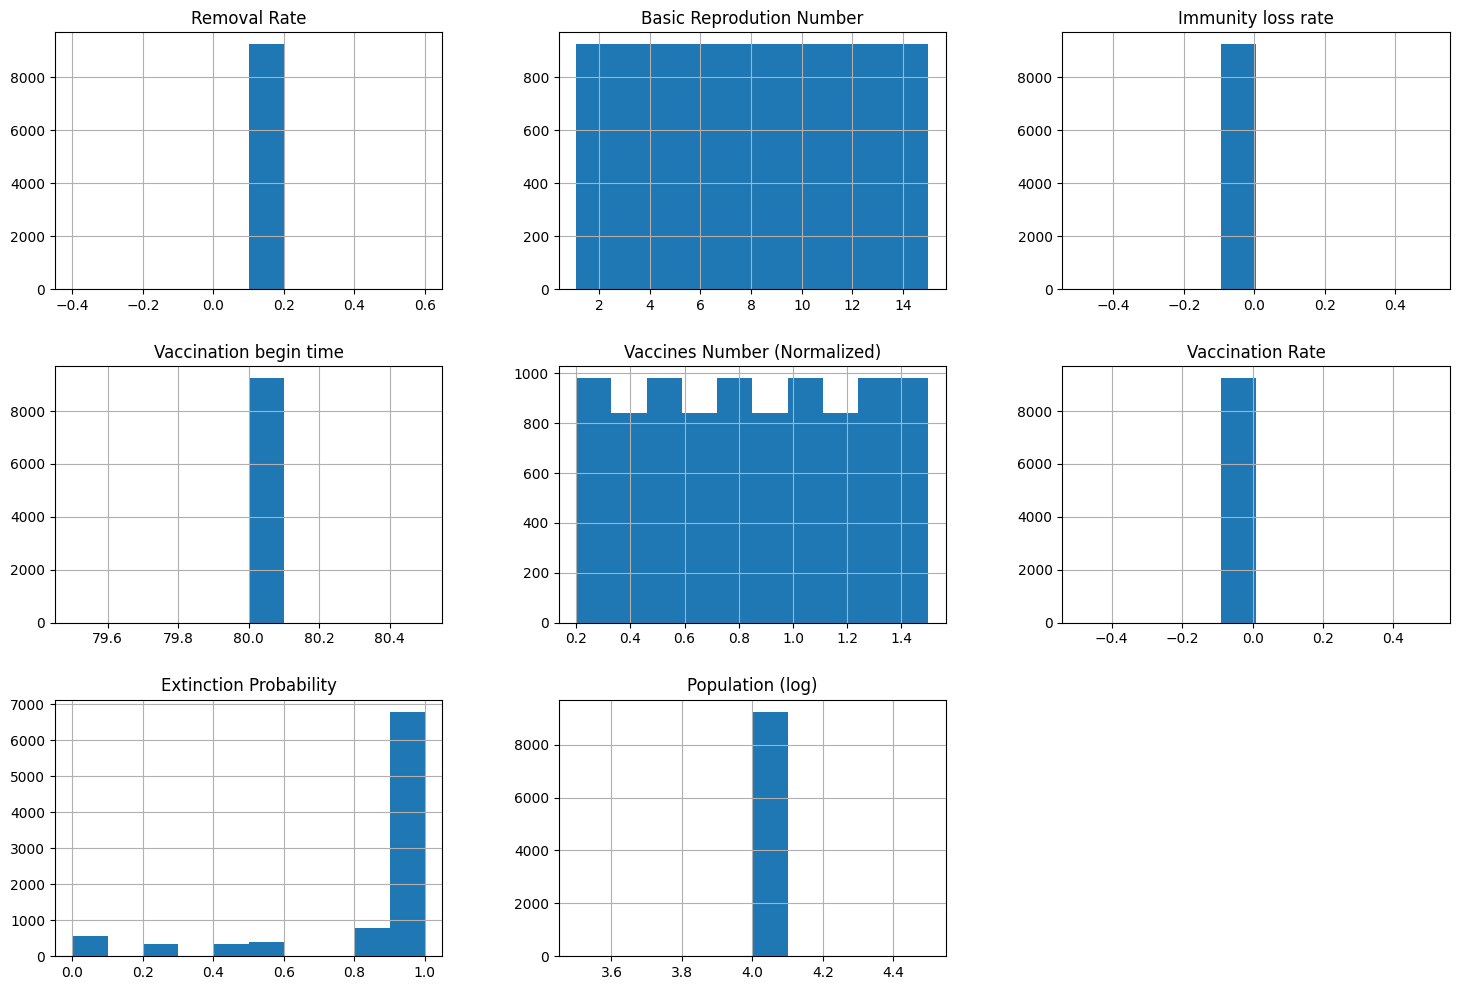

In [35]:
minimo_infectados_4.hist(figsize=(18, 12))
minimo_infectados_5.count()

[[1.  1.  0.8 ... 0.  0.  0. ]
 [1.  1.  0.2 ... 0.  0.  0. ]
 [0.8 1.  1.  ... 0.  0.  0.2]
 ...
 [1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]]


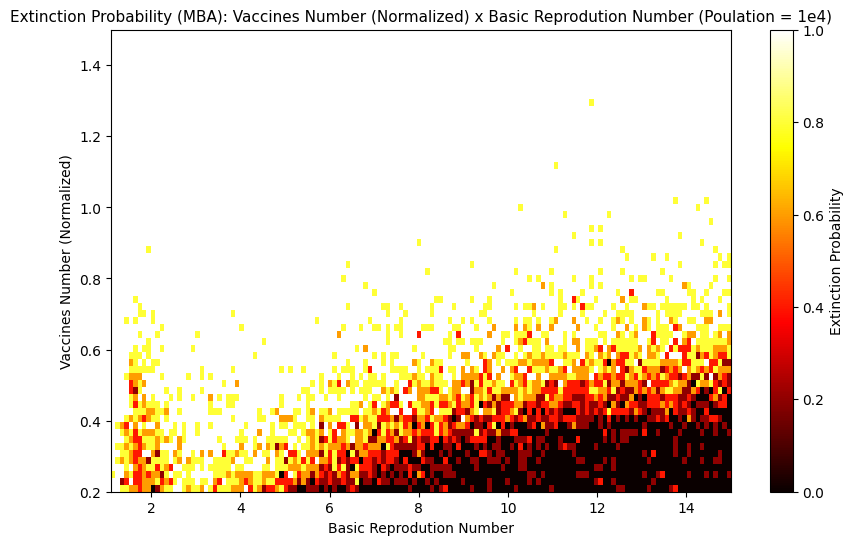

In [36]:
# minimo_infectados_4_4:
m = 'Basic Reprodution Number'
n = 'Vaccines Number (Normalized)'
x = minimo_infectados_4[m].values
y = minimo_infectados_4[n].values
z = minimo_infectados_4['Extinction Probability'].values
x_unique = np.sort(minimo_infectados_4[m].unique())
y_unique = np.sort(minimo_infectados_4[n].unique())
# Criando uma matriz de zeros com dimensões baseadas em x e y
Z = np.zeros((len(y_unique), len(x_unique)))
# Preencher a matriz Z com os valores correspondentes
for i, xi in enumerate(x_unique):
    for j, yj in enumerate(y_unique):
        mask = (minimo_infectados_4[m] == xi) & (minimo_infectados_4[n] == yj)
        if mask.any():
            Z[j, i] = minimo_infectados_4.loc[mask, 'Extinction Probability'].values.mean()
print(Z)
        # Criar o gráfico de mapa de calor
plt.figure(figsize=(10, 6))
plt.imshow(Z, aspect='auto', origin='lower', cmap='hot',
        extent=[x.min(), x.max(), y.min(), y.max()], vmin=0, vmax=1)

# Cor da barra de cor
cbar = plt.colorbar(label="Extinction Probability")
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='black')
cbar.set_label("Extinction Probability", color='black')

# Eixos e título em preto
plt.xlabel(m, color='black')
plt.ylabel(n, color='black')
plt.title(f"Extinction Probability (MBA): {n} x {m} (Poulation = 1e4)", color='black', fontsize=11)

# Ticks em preto
plt.tick_params(axis='both', colors='black')
plt.grid(False)
plt.show()

[[1.  0.8 0.6 ... 0.  0.  0. ]
 [1.  0.8 0.8 ... 0.  0.2 0. ]
 [1.  1.  0.8 ... 0.  0.  0.2]
 ...
 [1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]]


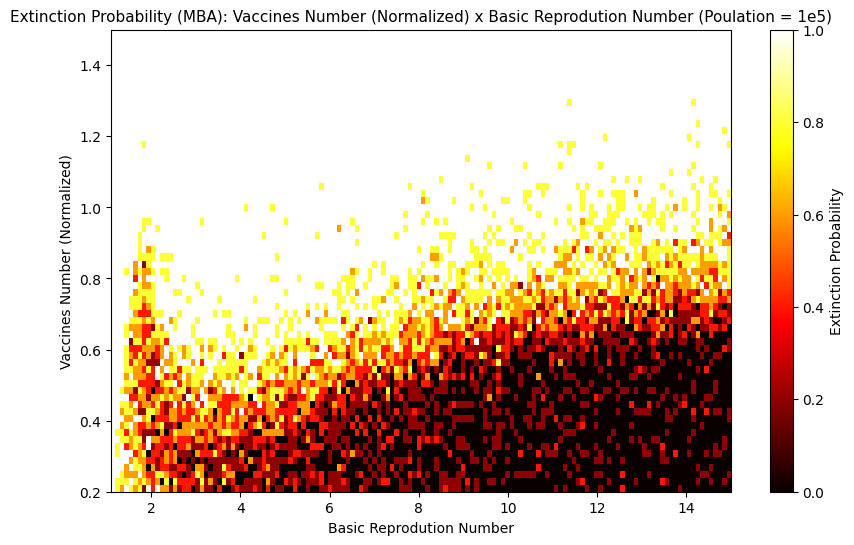

In [38]:
# minimo_infectados_5:
m = 'Basic Reprodution Number'
n = 'Vaccines Number (Normalized)'
x = minimo_infectados_5[m].values
y = minimo_infectados_5[n].values
z = minimo_infectados_5['Extinction Probability'].values
x_unique = np.sort(minimo_infectados_5[m].unique())
y_unique = np.sort(minimo_infectados_5[n].unique())
# Criando uma matriz de zeros com dimensões baseadas em x e y
Z = np.zeros((len(y_unique), len(x_unique)))
# Preencher a matriz Z com os valores correspondentes
for i, xi in enumerate(x_unique):
    for j, yj in enumerate(y_unique):
        mask = (minimo_infectados_5[m] == xi) & (minimo_infectados_5[n] == yj)
        if mask.any():
            Z[j, i] = minimo_infectados_5.loc[mask, 'Extinction Probability'].values.mean()
print(Z)
        # Criar o gráfico de mapa de calor
plt.figure(figsize=(10, 6))
plt.imshow(Z, aspect='auto', origin='lower', cmap='hot',
        extent=[x.min(), x.max(), y.min(), y.max()], vmin=0, vmax=1)

# Cor da barra de cor
cbar = plt.colorbar(label="Extinction Probability")
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='black')
cbar.set_label("Extinction Probability", color='black')

# Eixos e título em preto
plt.xlabel(m, color='black')
plt.ylabel(n, color='black')
plt.title(f"Extinction Probability (MBA): {n} x {m} (Poulation = 1e5)", color='black', fontsize=11)

# Ticks em preto
plt.tick_params(axis='both', colors='black')
plt.grid(False)
plt.show()